E3. 카메라 스티커앱 만들기 첫걸음
===
--- 

![sticker_app](https://user-images.githubusercontent.com/70703320/104260955-cf6a3000-54c7-11eb-9e0a-e30992682884.png)

이번 노드에서는 **사진에 여러 가지 스티커를 부착하기**를 해보았다. 이는 카메라 스티커앱을 만들때도 활용될 수 있다. 나중에 만들어볼 날을 기대하며 도전해본다!!


---

## 1. 사진에 고양이 수염스티커 붙이기

### 1.1 필요한 모듈 import

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

### 1.2 이미지를 읽어들이기
#### 1) colab으로 진행하여 google dirve에서 불러들이기

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')  

my_image_path = '/content/gdrive/My Drive/Colab Notebooks/h1.jpg'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### 2) 이미지를 imread로 불러들이기

In [3]:
img_bgr = cv2.imread(my_image_path)

#### 3) 이미지를 640X360 크기로 resize!

In [4]:
img_bgr = cv2.resize(img_bgr, (640, 360))    

#### 4) 출력용 이미지를 별도로 보관

In [5]:
img_show = img_bgr.copy()     

#### 5)  BGR이미지를 RGB이미지로 전환!

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb_copy = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#### 6) 이미지를 출력

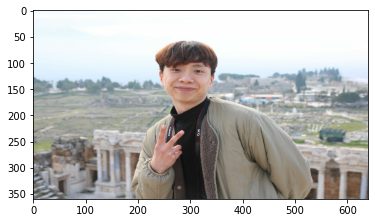

In [7]:
plt.imshow(img_rgb)
plt.show()

### 1.3 얼굴 인식하기

#### 1) dlib의 hog detector를 선언

In [8]:
detector_hog = dlib.get_frontal_face_detector() 

#### 2) detector를 이용하여 이미지의 얼굴 부분에서 bounding box처리할 좌표를 추출

In [9]:
dlib_rects = detector_hog(img_rgb, 1) 

### 먼저 cv2.rectangle의 기능을 먼저 확인해보자!

![스크린샷, 2021-01-12 11-53-44](https://user-images.githubusercontent.com/70703320/104263749-887f3900-54cd-11eb-86b4-1ed18e35d129.png)

[출처](https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/)

#### 3) 이미지에 인식 부분 box 좌표를 토대로 bounding box를 이미지 위에 표시

In [10]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (255,255,0), 1, lineType=cv2.LINE_4)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#### 4) bounding box의 꼭지점 좌표 출력 

In [11]:
print(dlib_rects)

rectangles[[(245, 86) (335, 176)]]


#### 5) bounding box가 표시된 이미지를 확인

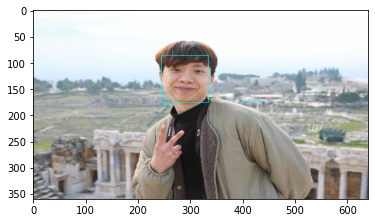

In [12]:
plt.imshow(img_show_rgb)
plt.show()

### 1.4 얼굴 랜드마크 표시하기

#### 1) 랜드마크의 경로 지정해주기

In [13]:
model_path = '//content/gdrive/My Drive/Colab Notebooks/shape_predictor_68_face_landmarks.dat'

#### 2) 저장한 랜드마크를 불러오기

In [14]:
landmark_predictor = dlib.shape_predictor(model_path)

#### 3) 불러온 이미지(img_rgb)와 bounding box의 좌표(dlib_rect)를 통해 랜드마크 표시

In [15]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

#### 4) 출력하여 list_landmark에 저장된 랜드마크의 개수 확인

In [16]:
print(len(list_landmarks[0]))

68


#### 5) 68개의 랜드마크를 표시하기

In [17]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 1, (0, 255, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#### 6) 이미지에 랜드마크 올려진 것 확인하기

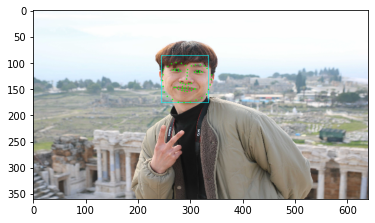

In [18]:
plt.imshow(img_show_rgb)
plt.show()

### 1.5 스티커 적용하기


### 여기서 어떻게 계산할 것인가를 고민!!

#### 먼저 스티커 확인!!
![cat-whiskers](https://user-images.githubusercontent.com/70703320/104287110-54217200-54f9-11eb-8826-82969fb9b626.png)

=> 스티커의 크기를 bounding box의 크기와 동일하게 해준 뒤 약간만 내려주면 됨!

#### 크기
- width : bounding box의 width과 동일
- height : bounding box의 height과 동일


#### 위치
![스크린샷, 2021-01-12 14-00-02](https://user-images.githubusercontent.com/70703320/104286817-eaa16380-54f8-11eb-9354-3037d4ec6031.png)

#### 위치
- x좌표 : 30의 좌표
- y좌표 : 30과 31의 평균 (코 중심과 코 아래의 가운데)

#### 1) 스티커 위치와 크기 정하기

In [19]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = (landmark[30][1]+landmark[33][1])//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(293, 131)
(x,y) : (293,136)
(w,h) : (91,91)


#### 2) 스티커 부를 경로 지정

In [20]:
sticker_path ='/content/gdrive/My Drive/Colab Notebooks/cat-whiskers.png'

#### 3) 스티커 이미지를 불러들여 저장

In [21]:
img_sticker = cv2.imread(sticker_path)

#### 4) 스티커 이미지의 크기를 재설정 후 확인

In [22]:
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(91, 91, 3)


#### 5) 스티커 이미지가 놓일 위치 조정

- 1.2의 6)을 확인해보면 x좌표는 왼쪽에서 오른쪽으로 숫자가 증가하고 y좌표는 위쪽에서 아래쪽으로 숫자가 증가한다.
![SmartSelectImage_2021-01-17-01-32-40](https://user-images.githubusercontent.com/70703320/104817331-ef9d4480-5863-11eb-98f7-24a41b33a420.png)
- 스티커가 놓이는 위치의 좌표에서 x좌표는 스티커의 맨 왼쪽, y좌표는 스티커의 맨 위쪽이다.
- 이를 고려하면 (x,y)좌표(스티커의 중점 좌표)에서 스티커의 width의 반정도의 길이를 왼쪽으로 옮겨주고 (빼주어야 함) 스티커의 height의 반정도의 길이를 위쪽으로 옮겨주어야 (빼주어야 함) 한다.

![2](https://user-images.githubusercontent.com/70703320/104817682-18263e00-5866-11eb-9635-b7e6cc070d2e.jpg)

In [23]:
refined_x = x - w // 2  
refined_y = y - h // 2   
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (248,91)


#### 6) 스티커를 원본 이미지에 적용할 범위 설정

![Inked1_LI](https://user-images.githubusercontent.com/70703320/104817764-9a166700-5866-11eb-8412-ab3a0770a84b.jpg)

In [24]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

#### 7) 스티커 이미지에서 사용할 부분이 0인 색이 있는 부분을 사용

In [25]:
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

#### 8) 최종 이미지 출력

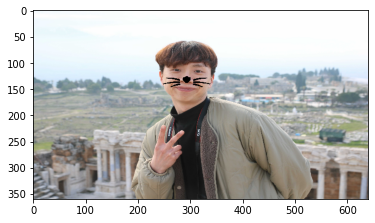

In [26]:
img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr)
plt.show()

---

## 2. 다른 사진에 적용 (거리 + 각도 + 여러 명 + 투명도 추가)


##### (코드 설명은 위와 동일하므로 간략히)

### 2.1 필요한 모듈 실행

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

### 2.2 이미지를 읽어들이기 (여기서 원본의 copy를 미리 빼둠)

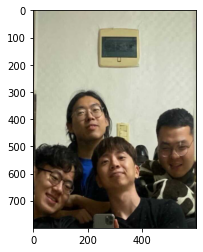

In [28]:
my_image_path = '/content/gdrive/My Drive/Colab Notebooks/h6.jpg'
img_bgr = cv2.imread(my_image_path)   
img_bgr_origin = cv2.resize(img_bgr, (600, 800))
img_show = img_bgr_origin.copy()      
img_rgb = cv2.cvtColor(img_bgr_origin, cv2.COLOR_BGR2RGB)
img_rgb_copy = cv2.cvtColor(img_bgr_origin, cv2.COLOR_BGR2RGB)  # 원본 copy 미리 빼둠
plt.imshow(img_rgb)
plt.show()

### 2.3 얼굴 인식하기

#### 1) bounding box처리할 좌표를 추출

In [29]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1) 


#### 2)  이미지에 인식 부분 box 좌표를 토대로 bounding box를 이미지 위에 표시 및 출력

rectangles[[(442, 442) (597, 597)], [(132, 322) (287, 477)], [(12, 580) (167, 735)]]


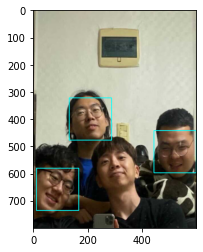

In [30]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (255,255,0), 2, lineType=cv2.FILLED)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 고개가 기울어진 인물, 고개를 숙인 인물도 포착 
- ~내 얼굴 인식 못하는 건 조금 유감~

### 2.4 얼굴에 랜드마크 표시하기

#### 1) 랜드마크 경로 지정 및 불러오기

In [31]:
model_path = '/content/gdrive/My Drive/Colab Notebooks/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#### 2) 랜드마크 표시하고 개수 확인

In [32]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]),len(list_landmarks[1]), len(list_landmarks[2]))

68 68 68


#### 3) 랜드마크 출력하기

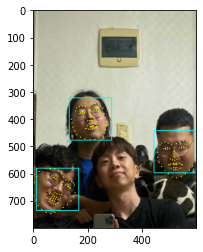

In [33]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()



- 3명의 얼굴에 맞게 랜드마크를 포착!

### 2.5 스티커 출력하기

#### 1) 스티커 위치와 크기 세팅

In [34]:
x = 0  # 세 명의 스티커가 붙여질 좌표를 각각 빼내기 위한 트릭

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  if x == 0:
    x = landmark[30][0]
    y = (landmark[30][1]+landmark[33][1])//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    H = 1
  elif H == 1:
    x1 = landmark[30][0]
    y1 = landmark[33][1]
    w1 = dlib_rect.width()
    h1 = dlib_rect.width()
    print ('(x1,y1) : (%d,%d)'%(x1,y1))
    print ('(w1,h1) : (%d,%d)'%(w1,h1))
    H = 2
  else:
    x2 = (landmark[30][0]+landmark[32][0])//2
    y2 = (landmark[30][1]+landmark[33][1])//2
    w2 = dlib_rect.width()
    h2 = dlib_rect.width()
    print ('(x2,y2) : (%d,%d)'%(x2,y2))
    print ('(w2,h2) : (%d,%d)'%(w2,h2))



(x,y) : (516,545)
(w,h) : (156,156)
(x1,y1) : (209,405)
(w1,h1) : (156,156)
(x2,y2) : (89,667)
(w2,h2) : (156,156)


- (x,y): 맨 오른쪽 인물 코의 좌표
- (x1, y1): 중간 인물 코의 좌표
- (x1, y1): 맨 왼쪽 인물 코의 좌표

#### 2) 스티커 크기 설정

In [35]:
sticker_path = '/content/gdrive/My Drive/Colab Notebooks/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker0 = cv2.resize(img_sticker, (w,h))
print (img_sticker0.shape)

img_sticker1 = cv2.resize(img_sticker, (w1,h1))
print (img_sticker1.shape)

img_sticker2 = cv2.resize(img_sticker, (w2,h2))
print (img_sticker2.shape)

(156, 156, 3)
(156, 156, 3)
(156, 156, 3)


#### 3) 스티커가 놓일 위치 지정

In [36]:
refined_x = x - w // 2  
refined_y = y - h // 2   
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

refined_x1 = x1 - w1 // 2  
refined_y1 = y1 - h1 // 2   
print ('(x1,y1) : (%d,%d)'%(refined_x1, refined_y1))

refined_x2 = x2 - w2 // 2  
refined_y2 = y2 - h2 // 2   
print ('(x2,y2) : (%d,%d)'%(refined_x2, refined_y2))

(x,y) : (438,467)
(x1,y1) : (131,327)
(x2,y2) : (11,589)


#### 4) 스티커 부착

In [37]:
sticker_area = img_bgr_origin[refined_y:refined_y + img_sticker0.shape[0], refined_x:refined_x+img_sticker0.shape[1]]
img_bgr_origin[refined_y:refined_y + img_sticker0.shape[0], refined_x:refined_x+img_sticker0.shape[1]] = \
    np.where(img_sticker0==0,img_sticker0,sticker_area).astype(np.uint8)

sticker_area = img_bgr_origin[refined_y1:refined_y1 + img_sticker1.shape[0], refined_x1:refined_x1+img_sticker1.shape[1]]
img_bgr_origin[refined_y1:refined_y1 + img_sticker1.shape[0], refined_x1:refined_x1+img_sticker1.shape[1]] = \
    np.where(img_sticker1==0,img_sticker1,sticker_area).astype(np.uint8)

sticker_area = img_bgr_origin[refined_y2:refined_y2 + img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]]
img_bgr_origin[refined_y2:refined_y2 + img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]] = \
    np.where(img_sticker2==0,img_sticker2,sticker_area).astype(np.uint8)

img_bgr_origin = cv2.cvtColor(img_bgr_origin, cv2.COLOR_BGR2RGB)


#### 5) 스티커 확인

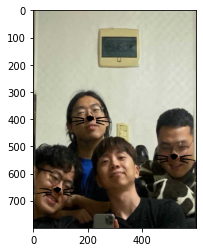

In [38]:
plt.imshow(img_bgr_origin)
plt.show()

6) 투명도 주기 (스티커 : 원본 = 0.7 : 0.3)

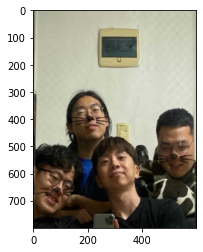

In [39]:
img_bgr_transport = cv2.addWeighted(img_bgr_origin, 0.6, img_rgb_copy, 0.4, 0)
plt.imshow(img_bgr_transport)
plt.show()

### 회고

1. 얼굴인식의 어려움
- resize 할 때 마다 인식하는 사람들이 달라졌다.
- 얼굴이 조금 기울어질 경우 인식이 잘 진행되지 않았다.
- 얼굴이 가려질 경우 인식이 잘 되지 않았다.
- ~내 얼굴이 인식되지 않았다.~

<br/>

2. 스티커 위치 교정의 어려움
- 처음에 y좌표가 일반적인 좌표와 달라 스티커의 위치 선정을 하는데 어려웠다.
- 그러나 y좌표의 방향을 인식하고 더해져가는 방향을 생각하며 해결할 수 있었다.
- 얼굴의 각도가 다른 경우는 그 때마다 조금씩 다르게 스티커 위치를 해주어야 했다.

<br/>

3. 여러 사람에게 랜드마크 부착의 어려움
- 처음에 랜드마크의 위치를 사람마다 빼내려고 하다가 애를 먹었으나 슬랙에 강태님의 조언을 참고하여 해결하였다.
- 좌표를 사람마다 주기 위해 3명의 좌표를 꺼내는데 어려웠으나 트릭을 생각해냈다. 

<br/>

4. 투명도를 부여하는데의 어려움
- 맨 처음에 원본사진을 빼두고 스티커를 부착한 사진이 나오면 비율을 부여하여 addWeight해주어 쉽게 해결할 수 있었다.

<br/>

### 루브릭

1. 자기만의 카메라앱 기능 구현을 완수하였다.
- 원본에 스티커 사진이 정상적으로 합성되었으며 스티커의 위치를 부여하는데 함수를 사용하여 정면이고 기울어지지 않았다면 사진만 바꿔줘도 정상작동 할 수 있도록 하였다.

2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
- 원하는 위치에 정확하게 부여하였으며 각도가 틀어지지만 않았다면 원본 얼굴에 정확하게 어울리도록 하였다. 각도가 심하게 틀어진 경우(2번에 왼쪽 인물) 스티커의 각도를 조정하는 것은 시도하지 못하였다. 하지만 선형대수를 이용하여 좌표들을 선형공간에서 이동시켜준다면 가능할 것이다. 이에 관한 자세한 수학 내용과 코드를 알게 된다면 도전해보도록 하겠다.

3. 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.
- 사람의 수를 늘려서 총 3명을 인식하여 붙이도록 시도를 해보았고, 고개를 아래로 숙인 인물(2번에 맨 오른쪽 인물)에 대해서도 붙여 보았고, 얼굴의 각도가 살짝 기울어진 인물(2번에 가운데 인물)에 대해서도 이에 따라 적당한 위치에 배열하도록 계산하였다. 또한, 투명도를 부여하는 것에도 성공하였다.
